![Screenshot 2025-08-20 150018.png](<attachment:Screenshot 2025-08-20 150018.png>)

![Screenshot 2025-08-20 150040.png](<attachment:Screenshot 2025-08-20 150040.png>)

![Screenshot 2025-08-20 150048.png](<attachment:Screenshot 2025-08-20 150048.png>)

![Screenshot 2025-08-20 150105.png](<attachment:Screenshot 2025-08-20 150105.png>)

![Screenshot 2025-08-20 150913.png](<attachment:Screenshot 2025-08-20 150913.png>)
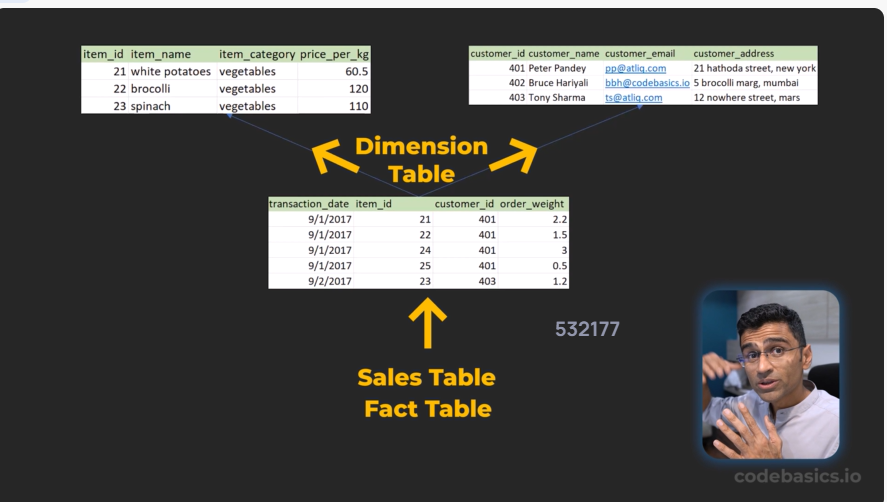
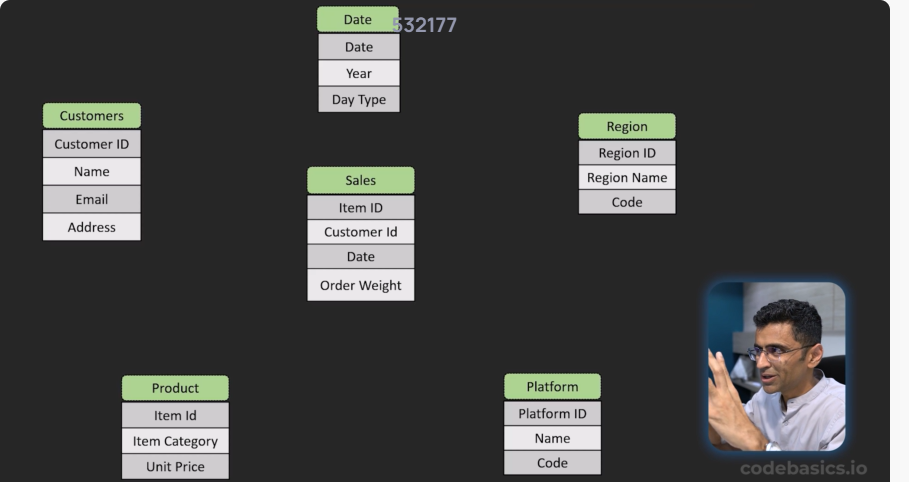
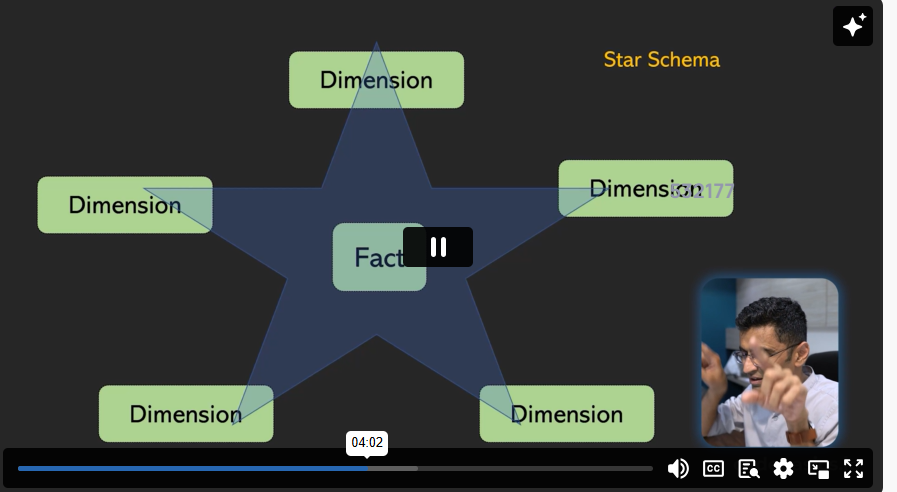
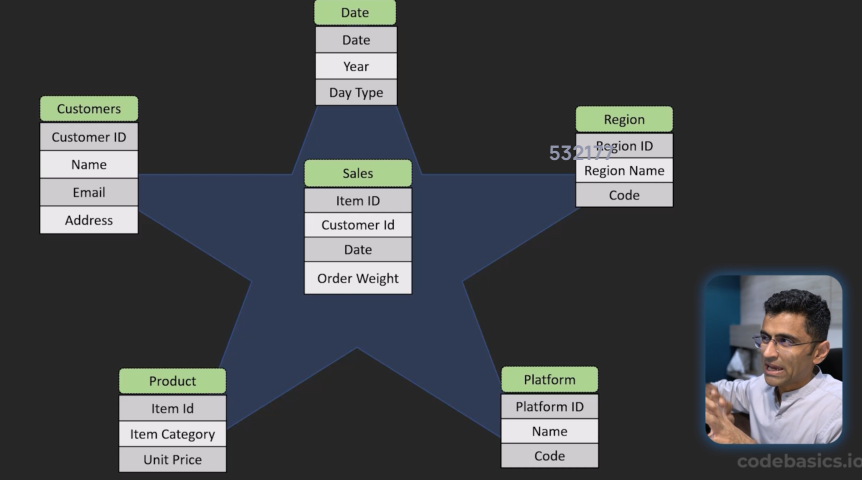
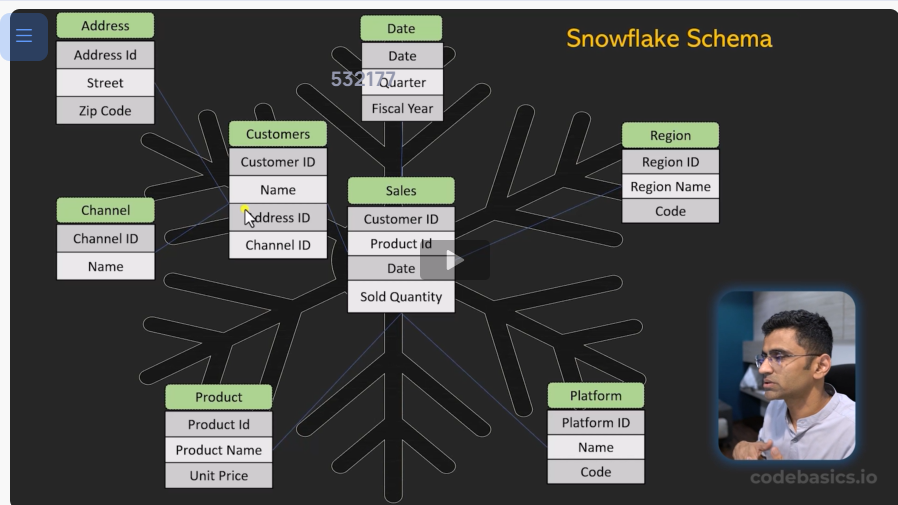

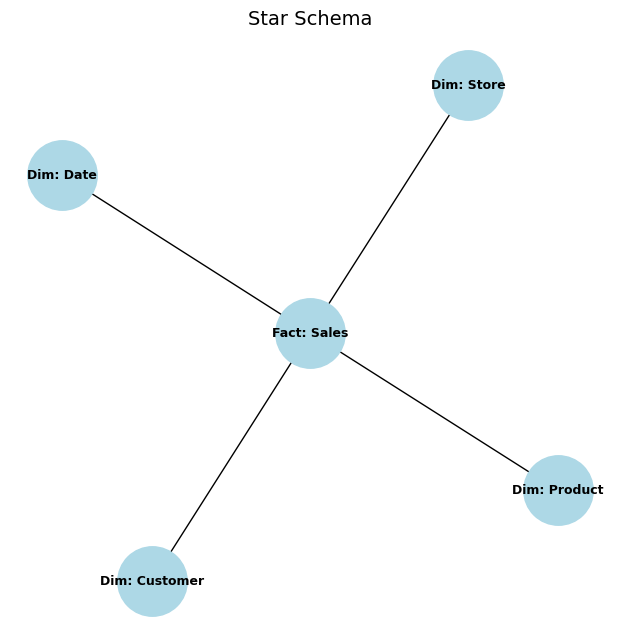

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()
fact = "Fact: Sales"
dimensions = ["Dim: Product", "Dim: Customer", "Dim: Date", "Dim: Store"]

G.add_node(fact)
for d in dimensions:
    G.add_node(d)
    G.add_edge(fact, d)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(6,6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=9, font_weight='bold')
plt.title("Star Schema", fontsize=14)
plt.show()

## 🎨 Visualization: Snowflake Schema
Now, let’s visualize a **Snowflake Schema** where a dimension table is normalized into sub-tables.

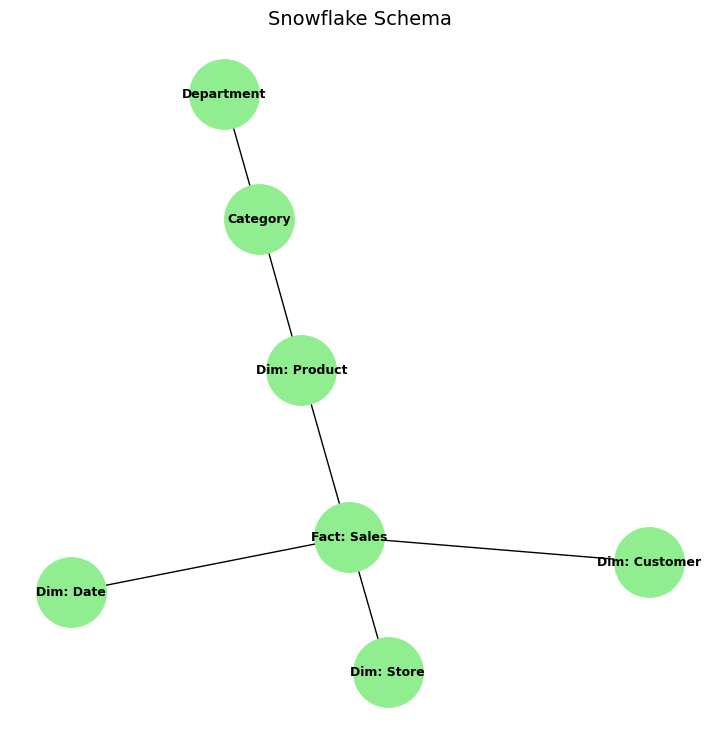

In [3]:
G2 = nx.Graph()
fact = "Fact: Sales"
dimensions = ["Dim: Product", "Dim: Customer", "Dim: Date", "Dim: Store"]

G2.add_node(fact)
for d in dimensions:
    G2.add_node(d)
    G2.add_edge(fact, d)

# Normalize Product dimension
G2.add_node("Category")
G2.add_edge("Dim: Product", "Category")
G2.add_node("Department")
G2.add_edge("Category", "Department")

pos2 = nx.spring_layout(G2, seed=10)
plt.figure(figsize=(7,7))
nx.draw(G2, pos2, with_labels=True, node_color='lightgreen', node_size=2500, font_size=9, font_weight='bold')
plt.title("Snowflake Schema", fontsize=14)
plt.show()

# Database Schemas & Normalization

This notebook explains some key concepts in **Data Warehousing** and **Database Design**:
- Star Schema
- Snowflake Schema
- Fact Table vs Dimension Table
- Database Normalization

## ⭐ 1. Star Schema
A **star schema** is a type of database schema used in **data warehousing**.  
- It looks like a star 🌟 because there’s a **central fact table** connected directly to multiple **dimension tables**.

**Example:**
- **Fact Table**: Sales (sales_id, product_id, customer_id, date_id, amount, quantity)  
- **Dimension Tables**: Product, Customer, Date, Store  

**Characteristics:**
- Simple structure → Easy to understand and query.  
- Redundancy can exist in dimension tables.  
- Mostly used in OLAP (analytical systems).

## ❄ 2. Snowflake Schema
A **snowflake schema** is an extension of the star schema.  
- Here, the **dimension tables are normalized** into multiple related tables, creating a structure like a snowflake ❄.

**Example:**
- **Dimension `Product`** might be split into:
  - Product Table → (product_id, product_name, category_id)  
  - Category Table → (category_id, category_name, department_id)  
  - Department Table → (department_id, department_name)  

**Characteristics:**
- Less redundancy due to normalization.  
- More complex queries (requires more joins).  
- Good for saving storage in large data warehouses.

## 📊 3. Fact Table vs Dimension Table

| Aspect | Fact Table | Dimension Table |
|--------|------------|-----------------|
| **Definition** | Stores *quantitative data* (measurable facts). | Stores *descriptive data* (attributes/context). |
| **Examples** | Sales amount, revenue, number of units sold. | Product details, customer info, time, location. |
| **Data type** | Numeric, additive. | Textual, categorical. |
| **Granularity** | Very detailed (each transaction). | Higher level (e.g., product name, city). |
| **Size** | Large (millions of rows). | Smaller (thousands of rows). |
| **Relationships** | Connected to multiple dimension tables (foreign keys). | Connected to fact tables (primary keys). |

**Think of it this way:**
- Fact Table = *“What happened?”*  
- Dimension Table = *“Who, What, Where, When, Why?”*

## 📚 4. Database Normalization
**Normalization** is the process of organizing data in a database to reduce redundancy and improve consistency.  
- It breaks larger tables into smaller ones and defines relationships between them.

### Normal Forms
1. **1NF (First Normal Form):**
   - Each column holds atomic (indivisible) values.  
   - No repeating groups.

2. **2NF (Second Normal Form):**
   - Must be in 1NF.  
   - No partial dependency (non-key column depends on part of a composite primary key).

3. **3NF (Third Normal Form):**
   - Must be in 2NF.  
   - No transitive dependency (non-key column depends on another non-key column).

4. **BCNF (Boyce-Codd Normal Form):**
   - A stricter version of 3NF.

### Purpose of Normalization
- Reduce redundancy.  
- Improve data integrity.  
- Make updates/inserts/deletes efficient and consistent.

## 🎨 Visualization: Star Schema
Let's visualize a **Star Schema** structure using a simple diagram.

## ✅ Summary
- **Star Schema:** Simple, fact table in center with denormalized dimensions.  
- **Snowflake Schema:** Complex, dimensions are normalized into multiple related tables.  
- **Fact vs Dimension Table:** Facts = measurable events, Dimensions = descriptive context.  
- **Normalization:** Organizing data to remove redundancy and ensure consistency.  